# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
from torch.utils.data import DataLoader

from datasets import FromNpDataset, ModelnetDataset, FAVOURITE_CLASS
from models import VAE, cd, ENCODER_HIDDEN, DECODER_LAYERS

# Prepare dataset

In [3]:
test_dataset = ModelnetDataset(filter=[FAVOURITE_CLASS])
test_loader = DataLoader(test_dataset, batch_size=32,
                        shuffle=True, num_workers=1)

# Visualize some data

In [4]:
def subplot_num(m, i, j):
    return i*m + j

def plot_samples(samples, n, m):
    fig = plt.figure(figsize=(18,18))
    for i in range(n):
        for j in range(m):
            idx = subplot_num(m, i, j)
            X, Y, Z = np.split(samples[idx], 3)
            ax = fig.add_subplot(n, m, idx+1, projection='3d')
            ax.scatter(X, Y, Z)        
    plt.show()
    
def apply_m_times(f, samples, m):
    applied = []
    for sample in samples:
        applied.append(sample)
        for i in range(m):
            applied.append(f(sample))
    return applied

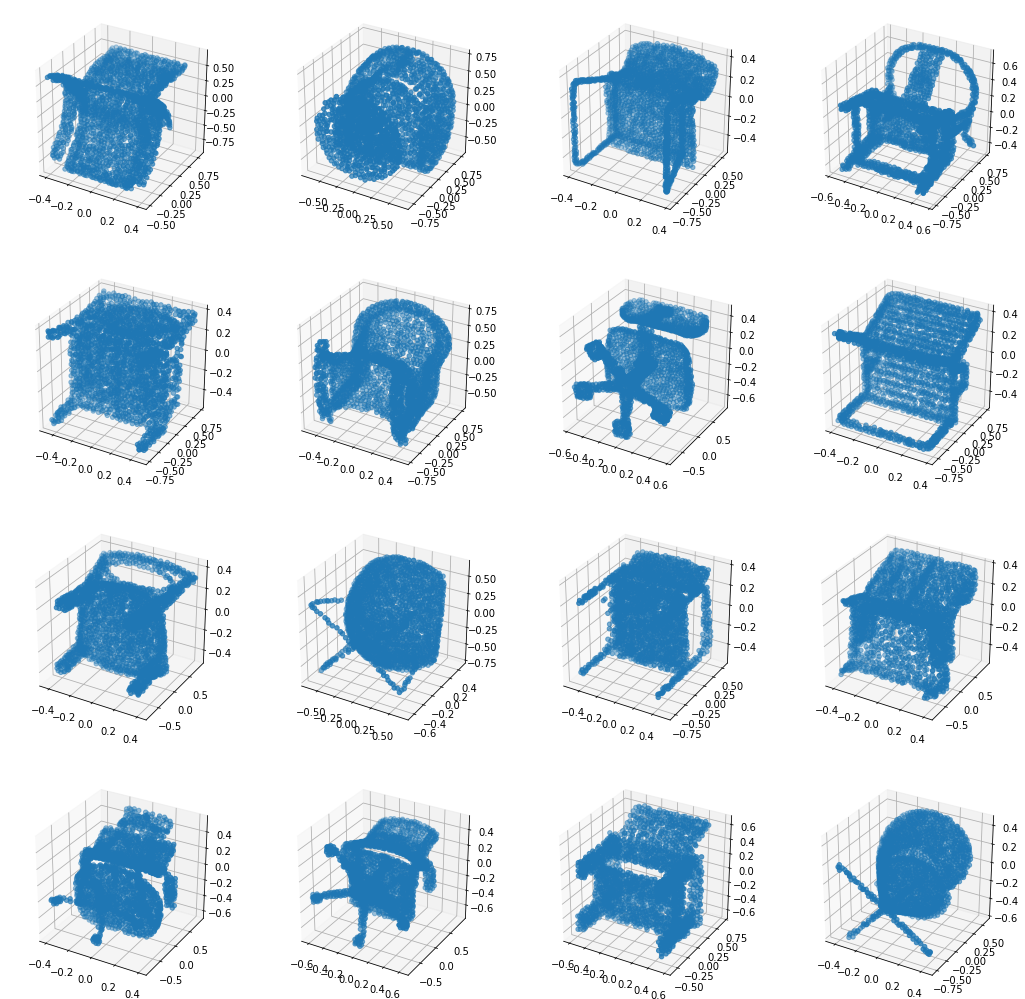

In [5]:
N, M = 4, 4
batch = next(iter(test_loader))[:N*M]
plot_samples(batch, N, M)

# Experiments

http://openaccess.thecvf.com/content_cvpr_2018/papers/Yang_FoldingNet_Point_Cloud_CVPR_2018_paper.pdf

In [6]:
model = VAE.load_from_drive(ENCODER_HIDDEN, DECODER_LAYERS, 'singleclass')

RuntimeError: Error(s) in loading state_dict for VAE:
	Missing key(s) in state_dict: "mean_encoder.model.stn.conv1.weight", "mean_encoder.model.stn.conv1.bias", "mean_encoder.model.stn.conv2.weight", "mean_encoder.model.stn.conv2.bias", "mean_encoder.model.stn.conv3.weight", "mean_encoder.model.stn.conv3.bias", "mean_encoder.model.stn.fc1.weight", "mean_encoder.model.stn.fc1.bias", "mean_encoder.model.stn.fc2.weight", "mean_encoder.model.stn.fc2.bias", "mean_encoder.model.stn.fc3.weight", "mean_encoder.model.stn.fc3.bias", "mean_encoder.model.stn.bn1.weight", "mean_encoder.model.stn.bn1.bias", "mean_encoder.model.stn.bn1.running_mean", "mean_encoder.model.stn.bn1.running_var", "mean_encoder.model.stn.bn2.weight", "mean_encoder.model.stn.bn2.bias", "mean_encoder.model.stn.bn2.running_mean", "mean_encoder.model.stn.bn2.running_var", "mean_encoder.model.stn.bn3.weight", "mean_encoder.model.stn.bn3.bias", "mean_encoder.model.stn.bn3.running_mean", "mean_encoder.model.stn.bn3.running_var", "mean_encoder.model.stn.bn4.weight", "mean_encoder.model.stn.bn4.bias", "mean_encoder.model.stn.bn4.running_mean", "mean_encoder.model.stn.bn4.running_var", "mean_encoder.model.stn.bn5.weight", "mean_encoder.model.stn.bn5.bias", "mean_encoder.model.stn.bn5.running_mean", "mean_encoder.model.stn.bn5.running_var", "mean_encoder.model.conv1.weight", "mean_encoder.model.conv1.bias", "mean_encoder.model.conv2.weight", "mean_encoder.model.conv2.bias", "mean_encoder.model.conv3.weight", "mean_encoder.model.conv3.bias", "mean_encoder.model.bn1.weight", "mean_encoder.model.bn1.bias", "mean_encoder.model.bn1.running_mean", "mean_encoder.model.bn1.running_var", "mean_encoder.model.bn2.weight", "mean_encoder.model.bn2.bias", "mean_encoder.model.bn2.running_mean", "mean_encoder.model.bn2.running_var", "mean_encoder.model.bn3.weight", "mean_encoder.model.bn3.bias", "mean_encoder.model.bn3.running_mean", "mean_encoder.model.bn3.running_var", "mean_encoder.fc1.weight", "mean_encoder.fc1.bias", "mean_encoder.fc2.weight", "mean_encoder.fc2.bias", "sigma_encoder.model.stn.conv1.weight", "sigma_encoder.model.stn.conv1.bias", "sigma_encoder.model.stn.conv2.weight", "sigma_encoder.model.stn.conv2.bias", "sigma_encoder.model.stn.conv3.weight", "sigma_encoder.model.stn.conv3.bias", "sigma_encoder.model.stn.fc1.weight", "sigma_encoder.model.stn.fc1.bias", "sigma_encoder.model.stn.fc2.weight", "sigma_encoder.model.stn.fc2.bias", "sigma_encoder.model.stn.fc3.weight", "sigma_encoder.model.stn.fc3.bias", "sigma_encoder.model.stn.bn1.weight", "sigma_encoder.model.stn.bn1.bias", "sigma_encoder.model.stn.bn1.running_mean", "sigma_encoder.model.stn.bn1.running_var", "sigma_encoder.model.stn.bn2.weight", "sigma_encoder.model.stn.bn2.bias", "sigma_encoder.model.stn.bn2.running_mean", "sigma_encoder.model.stn.bn2.running_var", "sigma_encoder.model.stn.bn3.weight", "sigma_encoder.model.stn.bn3.bias", "sigma_encoder.model.stn.bn3.running_mean", "sigma_encoder.model.stn.bn3.running_var", "sigma_encoder.model.stn.bn4.weight", "sigma_encoder.model.stn.bn4.bias", "sigma_encoder.model.stn.bn4.running_mean", "sigma_encoder.model.stn.bn4.running_var", "sigma_encoder.model.stn.bn5.weight", "sigma_encoder.model.stn.bn5.bias", "sigma_encoder.model.stn.bn5.running_mean", "sigma_encoder.model.stn.bn5.running_var", "sigma_encoder.model.conv1.weight", "sigma_encoder.model.conv1.bias", "sigma_encoder.model.conv2.weight", "sigma_encoder.model.conv2.bias", "sigma_encoder.model.conv3.weight", "sigma_encoder.model.conv3.bias", "sigma_encoder.model.bn1.weight", "sigma_encoder.model.bn1.bias", "sigma_encoder.model.bn1.running_mean", "sigma_encoder.model.bn1.running_var", "sigma_encoder.model.bn2.weight", "sigma_encoder.model.bn2.bias", "sigma_encoder.model.bn2.running_mean", "sigma_encoder.model.bn2.running_var", "sigma_encoder.model.bn3.weight", "sigma_encoder.model.bn3.bias", "sigma_encoder.model.bn3.running_mean", "sigma_encoder.model.bn3.running_var", "sigma_encoder.fc1.weight", "sigma_encoder.fc1.bias", "sigma_encoder.fc2.weight", "sigma_encoder.fc2.bias". 
	Unexpected key(s) in state_dict: "encoder.model.stn.conv1.weight", "encoder.model.stn.conv1.bias", "encoder.model.stn.conv2.weight", "encoder.model.stn.conv2.bias", "encoder.model.stn.conv3.weight", "encoder.model.stn.conv3.bias", "encoder.model.stn.fc1.weight", "encoder.model.stn.fc1.bias", "encoder.model.stn.fc2.weight", "encoder.model.stn.fc2.bias", "encoder.model.stn.fc3.weight", "encoder.model.stn.fc3.bias", "encoder.model.stn.bn1.weight", "encoder.model.stn.bn1.bias", "encoder.model.stn.bn1.running_mean", "encoder.model.stn.bn1.running_var", "encoder.model.stn.bn1.num_batches_tracked", "encoder.model.stn.bn2.weight", "encoder.model.stn.bn2.bias", "encoder.model.stn.bn2.running_mean", "encoder.model.stn.bn2.running_var", "encoder.model.stn.bn2.num_batches_tracked", "encoder.model.stn.bn3.weight", "encoder.model.stn.bn3.bias", "encoder.model.stn.bn3.running_mean", "encoder.model.stn.bn3.running_var", "encoder.model.stn.bn3.num_batches_tracked", "encoder.model.stn.bn4.weight", "encoder.model.stn.bn4.bias", "encoder.model.stn.bn4.running_mean", "encoder.model.stn.bn4.running_var", "encoder.model.stn.bn4.num_batches_tracked", "encoder.model.stn.bn5.weight", "encoder.model.stn.bn5.bias", "encoder.model.stn.bn5.running_mean", "encoder.model.stn.bn5.running_var", "encoder.model.stn.bn5.num_batches_tracked", "encoder.model.conv1.weight", "encoder.model.conv1.bias", "encoder.model.conv2.weight", "encoder.model.conv2.bias", "encoder.model.conv3.weight", "encoder.model.conv3.bias", "encoder.model.bn1.weight", "encoder.model.bn1.bias", "encoder.model.bn1.running_mean", "encoder.model.bn1.running_var", "encoder.model.bn1.num_batches_tracked", "encoder.model.bn2.weight", "encoder.model.bn2.bias", "encoder.model.bn2.running_mean", "encoder.model.bn2.running_var", "encoder.model.bn2.num_batches_tracked", "encoder.model.bn3.weight", "encoder.model.bn3.bias", "encoder.model.bn3.running_mean", "encoder.model.bn3.running_var", "encoder.model.bn3.num_batches_tracked", "encoder.fc1.weight", "encoder.fc1.bias", "encoder.fc2.weight", "encoder.fc2.bias". 

In [6]:
N, M = 4, 3
batch = next(iter(test_loader))
with torch.no_grad():
    samples = apply_m_times(lambda x: model(x.unsqueeze(0))[0].squeeze(0), batch[:N], M)
plot_samples(samples, N, M+1)

NameError: name 'model' is not defined

In [27]:
def reconstruct_dataset(model, loader):
    model.eval()
#     model.cuda()
    recs = []

    with torch.no_grad():
        for batch in loader:
#             batch = batch.cuda()

            rec, _, _ = model(batch)
            recs.append(rec)
    
    model.cpu()
    return torch.cat(recs, dim=0).cpu()

In [28]:
def nearest(sample, loader):
    best = np.inf
    sample_batch = x.unsqueeze(0).cuda()
    for batch in loader:
        batch = batch.cuda()
        if y.shape[0] != batch.shape[0]:
            y = x.expand(batch.shape[0], -1, -1).cuda()
        best = min(best, torch.min(cd(batch, sample_batch)).item().cpu())
    return best

def rec_nearest(data, loader):
    return [ nearest(data[idx], loader) for idx in range(data.shape[0]) ]

In [29]:
def cd_sample(data, idx, max_batch):
    sample = data[idx].unsqueeze(0)
    done = 0
    results = []
    while done < idx:
        batch_size = min(max_batch, idx-done)
        next_batch = data[done:done+batch_size].cuda()
        sample_batch = sample.expand(batch_size, -1, -1).cuda()
        results.append(cd(next_batch, sample_batch))
        done += batch_size
    return torch.cat(results, dim=0).cpu()

def cd_dataset(data, max_batch):
    N = len(data)
    d = torch.from_numpy(np.full((N, N), np.inf))
    for i in range(1, N):
        sample_d = cd_sample(data, i, max_batch)
        d[:i, i] = sample_d
        d[i, :i] = sample_d
    return d
            
def dataset_nearest(data, max_batch=64):
    d = cd_dataset(data, max_batch)
    return torch.min(d, dim=1)[0]

In [30]:
def cov(model, dataset, batch_size=64):
    with torch.no_grad():
        data_loader = DataLoader(dataset, batch_size=batch_size,
                            shuffle=False, num_workers=2)
        rec = reconstruct_dataset(model, data_loader).numpy()
        rec_dataset = FromNpDataset(rec)
        rec_loader = DataLoader(rec_dataset, batch_size=batch_size,
                               shuffle=False, num_workers=2)
        
        data = torch.from_numpy(dataset.data)
        
        d_dataset = dataset_nearest(data)
        d_rec = rec_nearest(data, rec_loader)
        
        return torch.sum(d_rec <= d_dataset) / len(dataset)

In [31]:
print(cov(model, test_dataset))

AssertionError: Torch not compiled with CUDA enabled